<a href="https://colab.research.google.com/github/gopaps/MachineLearning/blob/main/week%205/week_5_ke_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [3]:
# Import library yang diperlukan
from google.colab import drive # Import the drive object from google.colab

# Mount Google Drive agar dapat mengakses file
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:

# Load dataset dari Google Drive
# Sesuaikan path file dataset dengan lokasi yang ada di Google Drive Anda
file_path = '/content/drive/My Drive/dataset/data.csv'
df = pd.read_csv(file_path)




In [7]:
# Menampilkan beberapa baris pertama untuk melihat data secara umum
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
# 2. Menghapus kolom yang tidak diperlukan
# Kolom seperti 'Engine Fuel Type', 'Market Category', dan lainnya tidak diperlukan
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)


In [9]:
# 3. Mengganti nama kolom
# Beberapa nama kolom terlalu panjang atau tidak praktis, kita singkat agar lebih mudah diakses
df = df.rename(columns={
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPG": "MPG-H",
    "city mpg": "MPG-C",
    "MSRP": "Price"
})
df.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
# 4. Memeriksa dan menghapus baris duplikat
duplicate_rows_df = df[df.duplicated()]
print("Jumlah baris duplikat:", duplicate_rows_df.shape[0])

Jumlah baris duplikat: 989


In [11]:
# Menghapus baris duplikat
df = df.drop_duplicates()

In [12]:
# 5. Menghitung nilai kosong (missing values) pada setiap kolom
print("Jumlah nilai kosong pada setiap kolom:")
print(df.isnull().sum())


Jumlah nilai kosong pada setiap kolom:
Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [13]:
# Menghapus baris yang memiliki nilai kosong
df = df.dropna()

In [14]:
# Memastikan tidak ada lagi nilai kosong setelah penghapusan
print("Jumlah nilai kosong setelah penghapusan:")
print(df.isnull().sum())

Jumlah nilai kosong setelah penghapusan:
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


In [15]:
# 6. Visualisasi distribusi harga, HP, dan Cylinders
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Distribusi Harga')

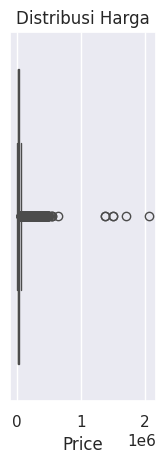

In [16]:
# Distribusi Harga
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Price'])
plt.title('Distribusi Harga')

Text(0.5, 1.0, 'Distribusi Tenaga Mesin (HP)')

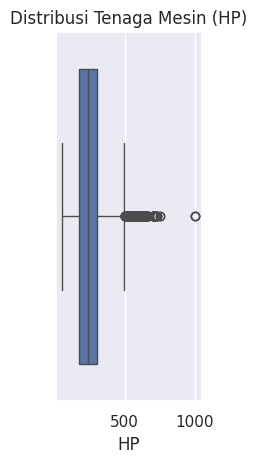

In [17]:
# Distribusi HP (Horse Power)
plt.subplot(1, 3, 2)
sns.boxplot(x=df['HP'])
plt.title('Distribusi Tenaga Mesin (HP)')

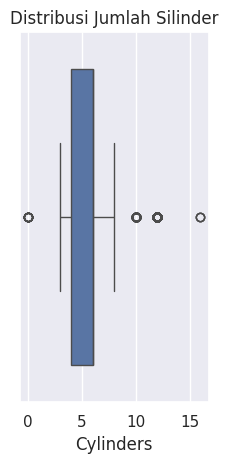

In [18]:
# Distribusi Jumlah Silinder
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Cylinders'])
plt.title('Distribusi Jumlah Silinder')

plt.tight_layout()
plt.show()

In [21]:
# Memilih hanya kolom numerik
numerical_df = df.select_dtypes(include=[np.number])

#7. Mengidentifikasi dan menghapus outlier menggunakan metode IQR
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Hanya mempertahankan data dalam rentang IQR (tanpa outlier)
df = df[~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Jumlah baris setelah penghapusan outlier:", df.shape[0])


Jumlah baris setelah penghapusan outlier: 9191


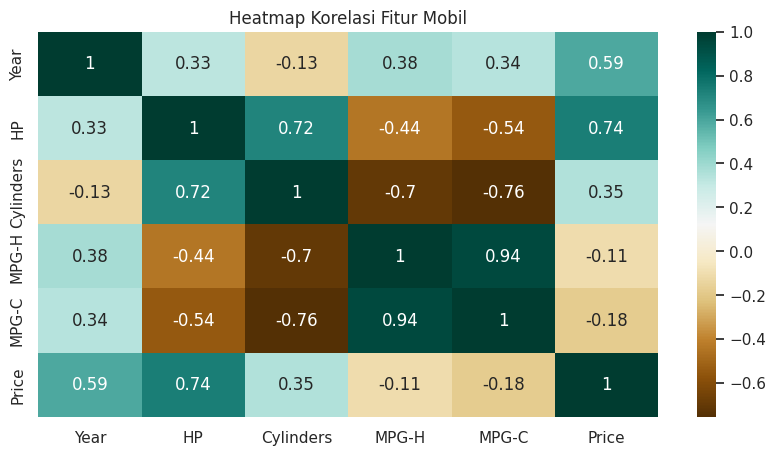

In [24]:
# Memilih hanya kolom numerik untuk korelasi
numerical_df = df.select_dtypes(include=[np.number])

# 8. Visualisasi korelasi antar fitur menggunakan heatmap
plt.figure(figsize=(10, 5))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, cmap="BrBG", annot=True)
plt.title("Heatmap Korelasi Fitur Mobil")
plt.show()


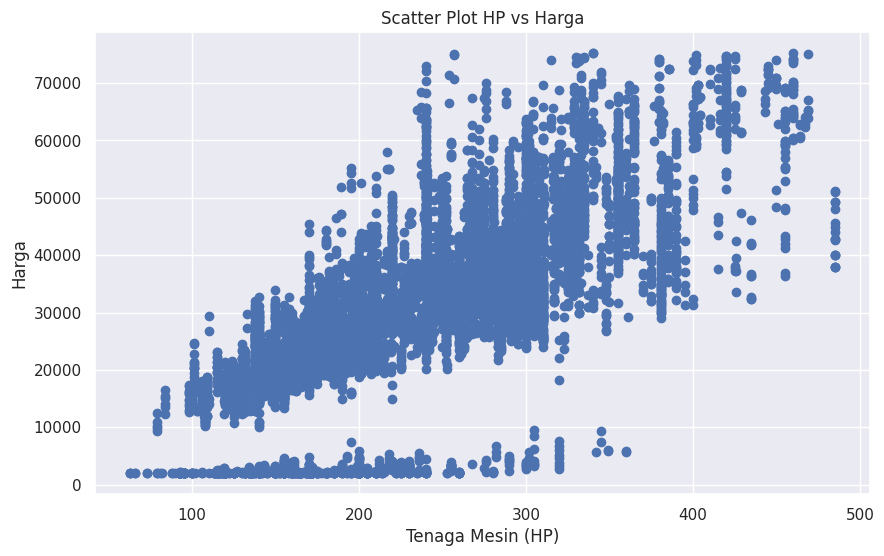

In [25]:
# 9. Scatter plot antara HP dan Harga
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('Tenaga Mesin (HP)')
ax.set_ylabel('Harga')
ax.set_title('Scatter Plot HP vs Harga')
plt.show()